In [471]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('boston.csv')
df = df.drop(['B'], axis=1)
#normalize data with min-max scaling
df=(df-df.values.min())/(df.values.max()-df.values.min())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.000009,0.025316,0.003249,0.0,0.000757,0.009248,0.091702,0.005752,0.001406,0.416315,0.021519,0.007004,0.033755
1,0.000038,0.000000,0.009944,0.0,0.000660,0.009031,0.110970,0.006986,0.002813,0.340366,0.025035,0.012855,0.030380
2,0.000038,0.000000,0.009944,0.0,0.000660,0.010105,0.085935,0.006986,0.002813,0.340366,0.025035,0.005668,0.048805
3,0.000046,0.000000,0.003066,0.0,0.000644,0.009842,0.064416,0.008526,0.004219,0.312236,0.026301,0.004135,0.046976
4,0.000097,0.000000,0.003066,0.0,0.000644,0.010052,0.076231,0.008526,0.004219,0.312236,0.026301,0.007496,0.050914
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000088,0.000000,0.016779,0.0,0.000806,0.009273,0.097187,0.003486,0.001406,0.383966,0.029536,0.013601,0.031505
502,0.000064,0.000000,0.016779,0.0,0.000806,0.008608,0.107876,0.003217,0.001406,0.383966,0.029536,0.012771,0.028973
503,0.000085,0.000000,0.016779,0.0,0.000806,0.009812,0.127989,0.003049,0.001406,0.383966,0.029536,0.007932,0.033615
504,0.000154,0.000000,0.016779,0.0,0.000806,0.009556,0.125598,0.003360,0.001406,0.383966,0.029536,0.009114,0.030942


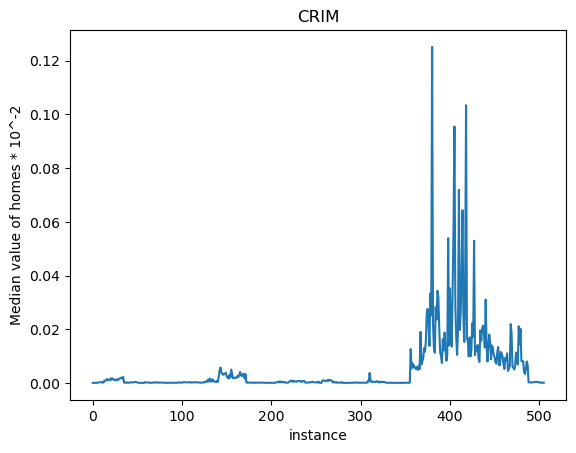

In [472]:
# for i in df.columns:
#     plt.figure()
#     plt.title(i)
#     plt.plot(df[i])

df["CRIM"].plot()
plt.title("CRIM")
plt.xlabel('instance')
plt.ylabel('Median value of homes * 10^-2')
plt.show()

In [455]:
df2 = df.drop(["MEDV"], axis=1)
X = df2.to_numpy()
Y = df["MEDV"].to_numpy()
# print(Y)
print(X.shape, Y.shape)
df2

(506, 12) (506,)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.000009,0.025316,0.003249,0.0,0.000757,0.009248,0.091702,0.005752,0.001406,0.416315,0.021519,0.007004
1,0.000038,0.000000,0.009944,0.0,0.000660,0.009031,0.110970,0.006986,0.002813,0.340366,0.025035,0.012855
2,0.000038,0.000000,0.009944,0.0,0.000660,0.010105,0.085935,0.006986,0.002813,0.340366,0.025035,0.005668
3,0.000046,0.000000,0.003066,0.0,0.000644,0.009842,0.064416,0.008526,0.004219,0.312236,0.026301,0.004135
4,0.000097,0.000000,0.003066,0.0,0.000644,0.010052,0.076231,0.008526,0.004219,0.312236,0.026301,0.007496
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000088,0.000000,0.016779,0.0,0.000806,0.009273,0.097187,0.003486,0.001406,0.383966,0.029536,0.013601
502,0.000064,0.000000,0.016779,0.0,0.000806,0.008608,0.107876,0.003217,0.001406,0.383966,0.029536,0.012771
503,0.000085,0.000000,0.016779,0.0,0.000806,0.009812,0.127989,0.003049,0.001406,0.383966,0.029536,0.007932
504,0.000154,0.000000,0.016779,0.0,0.000806,0.009556,0.125598,0.003360,0.001406,0.383966,0.029536,0.009114


In [439]:
class LinearRegression:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias
        pass
    
    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]                         #add a dimension for the features
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])    #add bias by adding a constant feature of value 1
        self.w = np.linalg.inv(x.T @ x)@x.T@y
        return self
    
    def predict(self, x):
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])
        yh = x@self.w                             #predict the y values
        return yh

In [440]:
N = X.shape[0]
model = LinearRegression()
yh = model.fit(X,Y).predict(X)

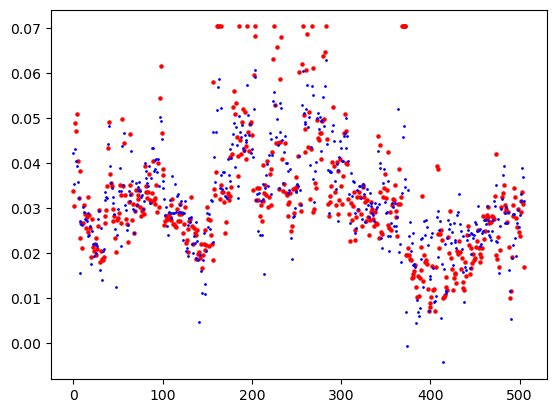

In [441]:
plt.scatter(np.arange(X.shape[0]),Y, s=5, color='red')
plt.scatter(np.arange(X.shape[0]),yh, s=1, color='blue')

## Generate many tests of growing subsets of training data:

In [442]:
#Train and Test
import math
from math import log10, floor
from sklearn.model_selection import train_test_split

class train_and_test():
    
    def __init__(self, X, Y, arr, n):
        self.x = X
        self.y = Y
        self.arr = arr
        self.n = n
        pass
    
    def train_and_eval(self, tSize, show):
        
        X_train, X_test, Y_train, Y_test = train_test_split(self.x, self.y, test_size=tSize)
        model = LinearRegression()
        reg = model.fit(X_train, Y_train)
        yh = reg.predict(X_test)
        yhtrain = reg.predict(X_train)
        
        #METRICS ON TEST SET
        MSE = np.square(np.subtract(Y_test,yh)).mean()
        RMSE = math.sqrt(MSE)

        RSS = ((Y_test - yh)**2).sum()
        TSS = ((Y_test - yh.mean())**2).sum()
        r2 = 1 - RSS/TSS

        #METRICS ON TRAINING SET
        trainMSE = np.square(np.subtract(Y_train,yhtrain)).mean()
        trainRMSE = math.sqrt(trainMSE)

        trainRSS = ((Y_train - yhtrain)**2).sum()
        trainTSS = ((Y_train - yhtrain.mean())**2).sum()
        trainR2 = 1 - trainRSS/trainTSS
        
        test = [RMSE, r2]
        train = [trainRMSE, trainR2]
        
        if show: 
            #metrics on TEST set
            fig, ax = plt.subplots()
            ax.scatter(Y_test, yh)
            ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
            plt.title('Test Set, RMSE: %.3g, R2: %.3g' %(RMSE,r2))
            ax.set_xlabel("true y")
            ax.set_ylabel("predicted y")
            #plt.savefig('bTest20.png', bbox_inches='tight')
            plt.show()

            #metrics on TRAIN set
            fig, ax = plt.subplots()
            ax.scatter(Y_train, yhtrain)
            ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
            plt.title('Train Set, RMSE: %.3g, R2: %.3g' %(trainRMSE,trainR2))
            ax.set_xlabel("true y")
            ax.set_ylabel("predicted y")
            #plt.savefig('bTrain20.png', bbox_inches='tight')
            plt.show()
        else:
            return test,train
    
    def train_and_eval_mult(self):
        test_result_matrix = np.empty((self.n, len(self.arr)))
        train_result_matrix = np.empty((self.n, len(self.arr)))
        for i in range(self.n):
            for size in self.arr:
                k = (int) (size*10)-1
                te, tr = self.train_and_eval(size, False)
                #change to te[1],tr[1] for R2
                test_result_matrix[i,k] = te[0]
                train_result_matrix[i,k] = tr[0]
        return test_result_matrix, train_result_matrix
    
    def show(self, save):
        test, train = self.train_and_eval_mult()
        testDf = pd.DataFrame(test)
        trainDf = pd.DataFrame(train)
        testDf.columns = [str(e) for e in self.arr]
        trainDf.columns = [str(e) for e in self.arr]
        testDf = testDf.transpose()
        trainDf = trainDf.transpose()
        testDf.columns = [str(e) for e in range(self.n)]
        trainDf.columns = [str(e) for e in range(self.n)]
        
        #plot train data
        for i in range(self.n-1):
            plt.scatter(trainDf.index, trainDf[str(i+1)])
        plt.title('Performance on prediction of TRAIN set, n=%d' %self.n)
        plt.xlabel("percent of test split")
        #plt.ylabel("${R^2}$")
        plt.ylabel("RMSE")
        if save: plt.savefig('bTrainMulti%i.png' %self.n, bbox_inches='tight') 
        plt.show()
        
        #plot test data
        for i in range(self.n-1):
            plt.scatter(testDf.index, testDf[str(i+1)])
        plt.title('Performance on prediction of TEST set, n= %d' %self.n)
        plt.xlabel("percent of test split")
        #plt.ylabel("${R^2}$")
        plt.ylabel("RMSE")
        if save: plt.savefig('bTestMulti%i.png' %self.n, bbox_inches='tight')
        plt.show()
    

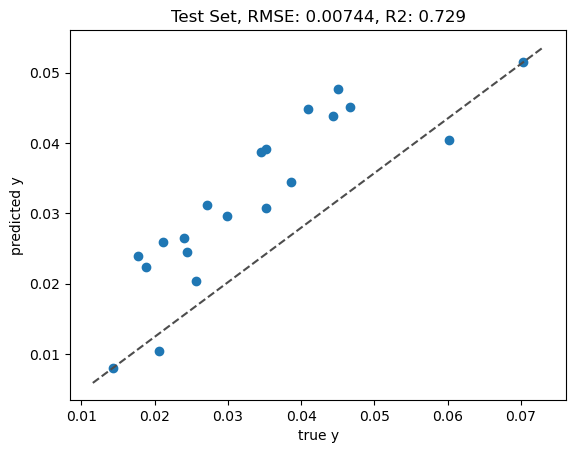

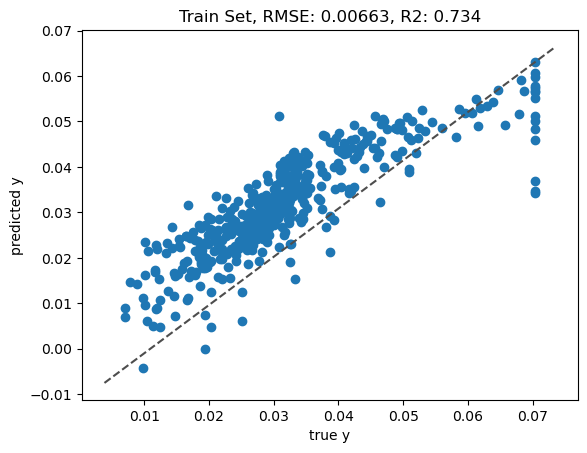

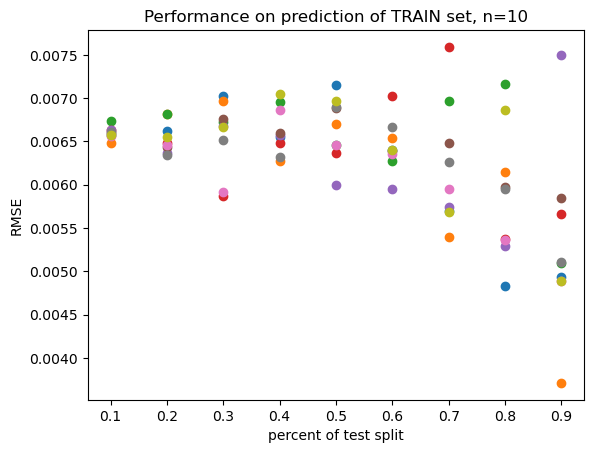

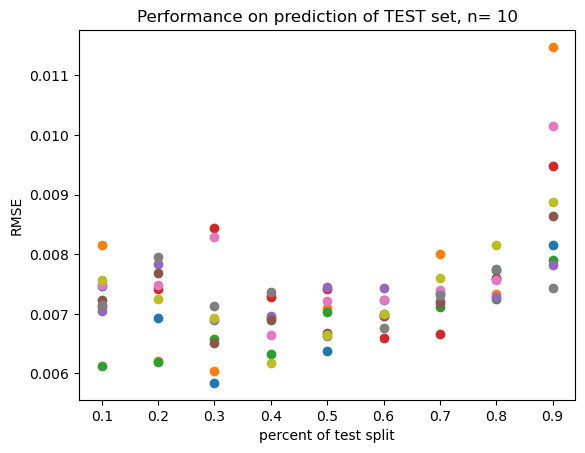

In [448]:
arr = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
evaluate = train_and_test(X,Y,arr,10)
evaluate.train_and_eval(20, True)
evaluate.show(False)

## Gaussian Basis Functions
Define five Gaussian basis functions for each feature. Select ${μ_j}$ values randomly from each respective feautre to determine the centers of these basis functions

[3.48828411e-02 2.15021097e-02 1.97637131e-04 1.08718706e-03
 8.73558368e-05]


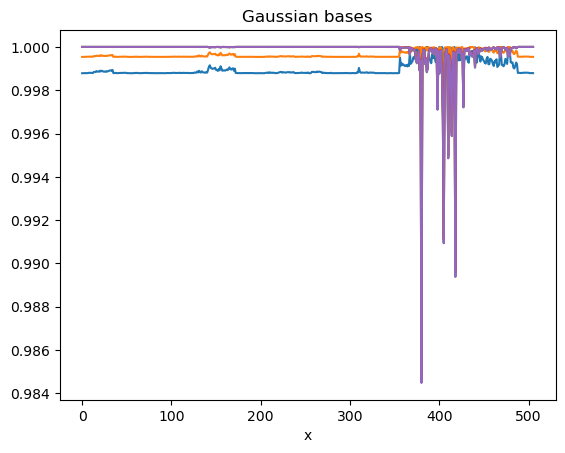

,0,1,2,3,4
0,0.998785,0.999538,1.0,0.999999,1.0
1,0.998787,0.999539,1.0,0.999999,1.0
2,0.998787,0.999539,1.0,0.999999,1.0
3,0.998787,0.999540,1.0,0.999999,1.0
4,0.998791,0.999542,1.0,0.999999,1.0
...,...,...,...,...,...
501,0.998790,0.999542,1.0,0.999999,1.0
502,0.998788,0.999540,1.0,0.999999,1.0
503,0.998790,0.999541,1.0,0.999999,1.0
504,0.998795,0.999544,1.0,0.999999,1.0


In [531]:
#trying for feature 1
D =5

feature = X[:,0]
xs = np.arange(len(feature))
mu = np.random.choice(feature, 5, replace=False)
print(mu)

def gaussian(x,mu,sigma):
    return np.exp(-((x-mu)/sigma)**2)   

phi = gaussian(feature[:,None], mu[None,:],1)
df = pd.DataFrame(phi)
#print(phi)
for d in range(D):
    plt.plot(xs, phi[:,d])
plt.xlabel('x')
plt.title('Gaussian bases')
plt.show()
df